In [1]:
import math
import numpy as np

In [2]:
rnd = np.random.RandomState(1234)

n = 10
A = rnd.uniform(size=(n, n)) + np.diag([15]*n)
b = rnd.uniform(size=n)

In [3]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)

D_inv = np.diag(1/diag_1d)
BB = D_inv @ B
c = D_inv @ b

In [4]:
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)

xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A @ xx, b)
np.testing.assert_allclose(D @ xx, B @ xx + b)
np.testing.assert_allclose(xx, BB @ xx + c)

In [5]:
np.linalg.norm(BB)

0.36436161983015336

In [6]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
  x = BB @ x + c
A @ x - b

array([ 1.11022302e-16,  0.00000000e+00, -2.22044605e-16, -1.11022302e-16,
        1.11022302e-16,  0.00000000e+00, -2.42861287e-17,  0.00000000e+00,
       -2.77555756e-17,  1.11022302e-16])

In [7]:
def jacobi_iteration(A, b, n_iteriter):
    
    diag_1d = np.diag(A)

    B = -A.copy()
    np.fill_diagonal(B, 0)

    D = np.diag(diag_1d)

    D_inv = np.diag(1./diag_1d)
    B = D_inv @ B
    c = D_inv @ b
    
    m = A.shape[0]
    
    x0 = np.ones(m)
    
    errors = np.zeros(n_iter)
    
    for i in range(n_iter):
        x = B @ x0 + c
        delta_x = np.linalg.norm(x - x0)
        errors[i] = delta_x
        
        x0 = x
        
    return x, B, np.array(errors)

In [8]:
n = 10
A = rnd.uniform(size=(n, n))
b = rnd.uniform(size=n)

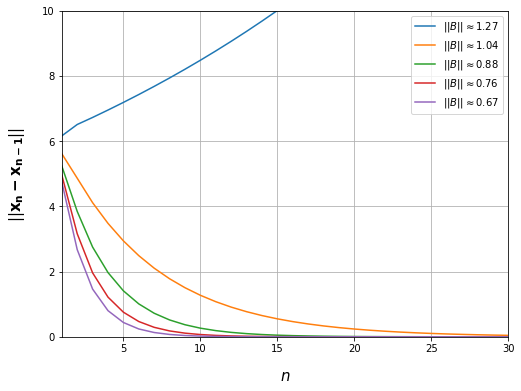

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

n_iter = 50

for j in range(5):
    A_j = A + np.diagflat([j + 3.9]*n)

    x, B, errors = jacobi_iteration(A_j, b, n_iter)

    iterations = np.arange(1, n_iter + 1)
    
    plt.plot(iterations, errors, label=r'$||B|| \approx %s$' % round(np.linalg.norm(B), 2))

#plt.title(r'$||x_n - x_{n-1}||$ v.s. $n$')
plt.ylabel(r'$||\mathbf{x_n - x_{n-1}}||$', size=15, labelpad=15)
plt.xlabel(r'$n$', size=15, labelpad=15)
plt.ylim(0, 10)
plt.xlim(1, 30)
plt.legend()
plt.grid()
plt.show()